In [1]:
# Plotting the balmer break strength along range start,start+100 for a given wavelengths (starts)

In [62]:
from astropy.cosmology import Planck13
from prospectFunctions import *
import numpy as np
import itertools
from matplotlib.pyplot import *

In [3]:
data_grid_params = np.load('params.npy')
# [zred,mass,logz,dust,tage]
data_grid_spec = np.load('specs.npy')
data_grid_phot = np.load('phots.npy')

grid_ranges = {}
grid_ranges['logzsol'] = np.linspace(-1,.5,10)
grid_ranges['dust2'] = np.linspace(0,3,10)
grid_ranges['tage'] = np.linspace(7,9,10)

logzs = grid_ranges['logzsol']
dusts = grid_ranges['dust2']
tages = grid_ranges['tage']

run_params = {}
run_params['zred'] = 3.548
run_params['mass'] = 1e8
run_params['add_duste'] = False
run_params['zcontinuous'] = 1

a = 1.0 + run_params['zred']

obs = getObs(**run_params)
sps = getSps(**run_params)
wspec, wphot = getWave(obs=obs,sps=sps,**run_params)

In [10]:
# VERSION OF CALCULATING BALMER BREAK ANNA USED

bounds = getBreakBoundsAnna(wspec, **run_params)
blue_lower, blue_upper = bounds['blue'][0], bounds['blue'][1]
red_lower, red_upper = bounds['red'][0], bounds['red'][1]

data_grid_break_3620 = np.empty((len(logzs),len(dusts),len(tages),1))

for i_logz,i_dust,i_tage in itertools.product(range(len(logzs)),range(len(dusts)),range(len(tages))):
    lower = data_grid_spec[i_logz,i_dust,i_tage,blue_lower:blue_upper].mean()
    upper = data_grid_spec[i_logz,i_dust,i_tage,red_lower:red_upper].mean()

    ratio = upper/lower

    data_grid_break_3620[i_logz,i_dust,i_tage,:] = ratio

In [11]:
# VERSION OF CALCULATING BALMER BREAK D4000 USED

bounds = getBreakBoundsD4000(wspec, **run_params)
blue_lower, blue_upper = bounds['blue'][0], bounds['blue'][1]
red_lower, red_upper = bounds['red'][0], bounds['red'][1]

data_grid_break_3850 = np.empty((len(logzs),len(dusts),len(tages),1))

for i_logz,i_dust,i_tage in itertools.product(range(len(logzs)),range(len(dusts)),range(len(tages))):
    lower = data_grid_spec[i_logz,i_dust,i_tage,blue_lower:blue_upper].mean()
    upper = data_grid_spec[i_logz,i_dust,i_tage,red_lower:red_upper].mean()

    ratio = upper/lower

    data_grid_break_3850[i_logz,i_dust,i_tage,:] = ratio

In [57]:
break_strengths = {}

starts = np.linspace(3620, 3850, 231, dtype=int)

for start in starts:
    
    bounds = getBreakBounds(wspec, start, **run_params)
    
    blue_lower, blue_upper = bounds['blue'][0], bounds['blue'][1]
    red_lower, red_upper = bounds['red'][0], bounds['red'][1]
    
    data_grid_break = np.empty((len(logzs),len(dusts),len(tages),1))
    
    for i_logz,i_dust,i_tage in itertools.product(range(len(logzs)),range(len(dusts)),range(len(tages))):
        lower = data_grid_spec[i_logz,i_dust,i_tage,blue_lower:blue_upper].mean()
        upper = data_grid_spec[i_logz,i_dust,i_tage,red_lower:red_upper].mean()
    
        ratio = upper/lower
    
        data_grid_break[i_logz,i_dust,i_tage,:] = ratio
    
    break_strengths[f'data_grid_break_{start}'] = data_grid_break

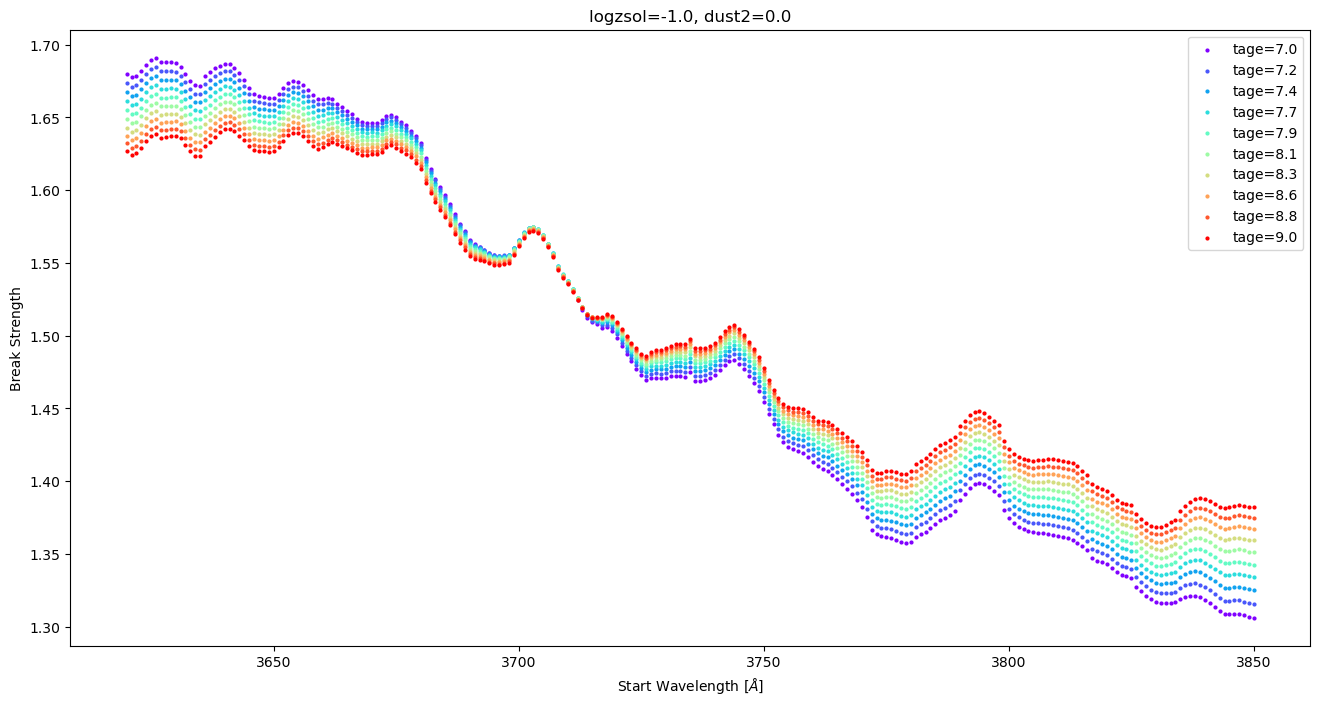

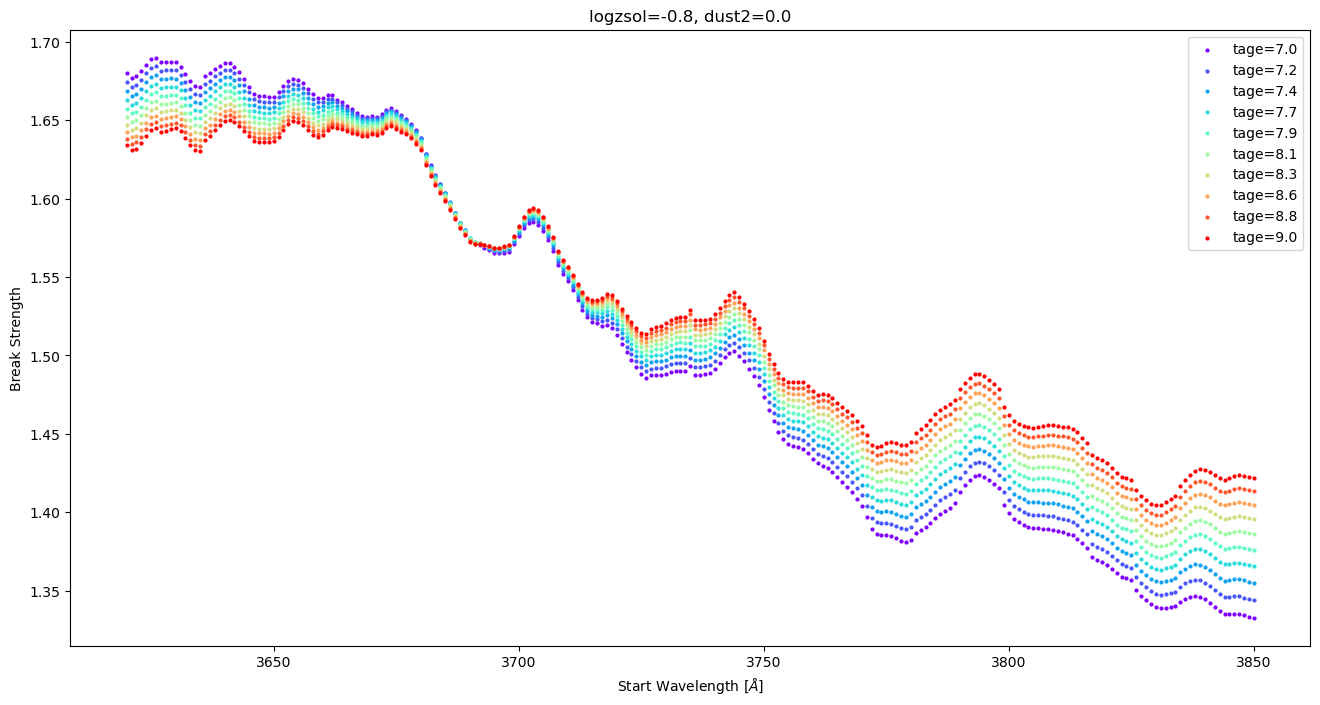

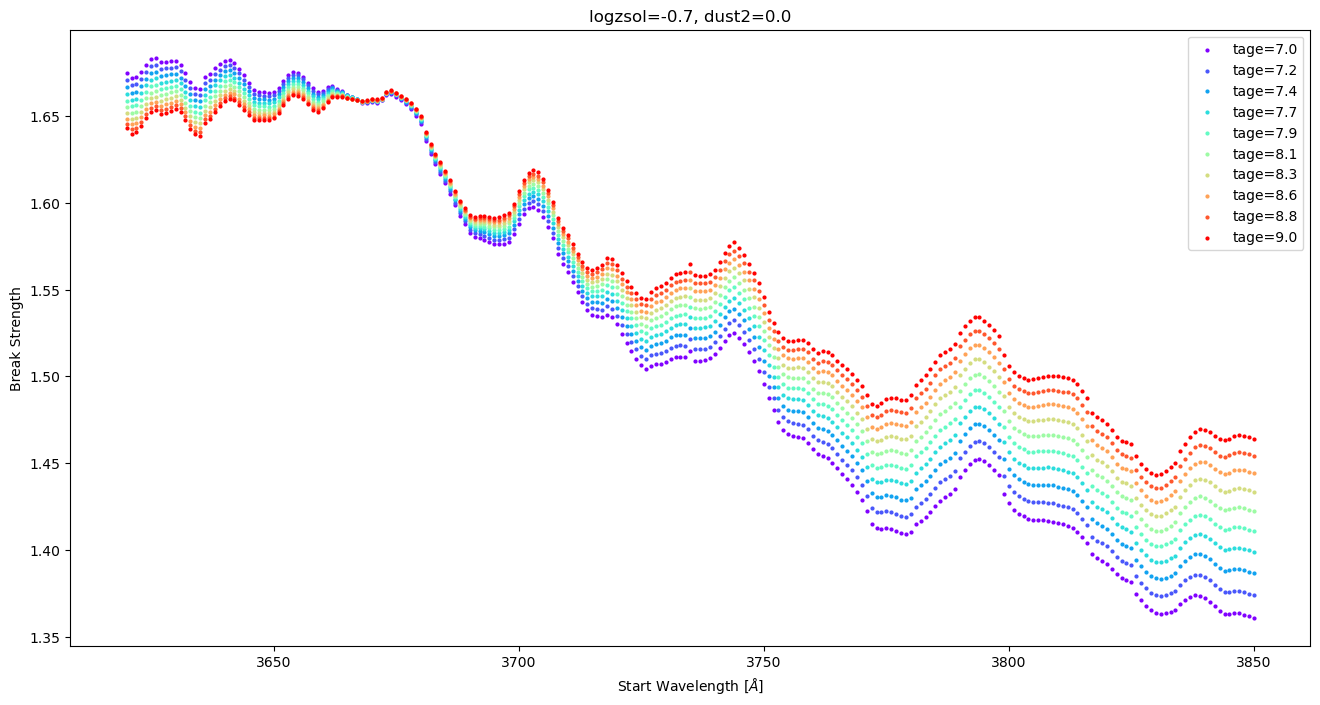

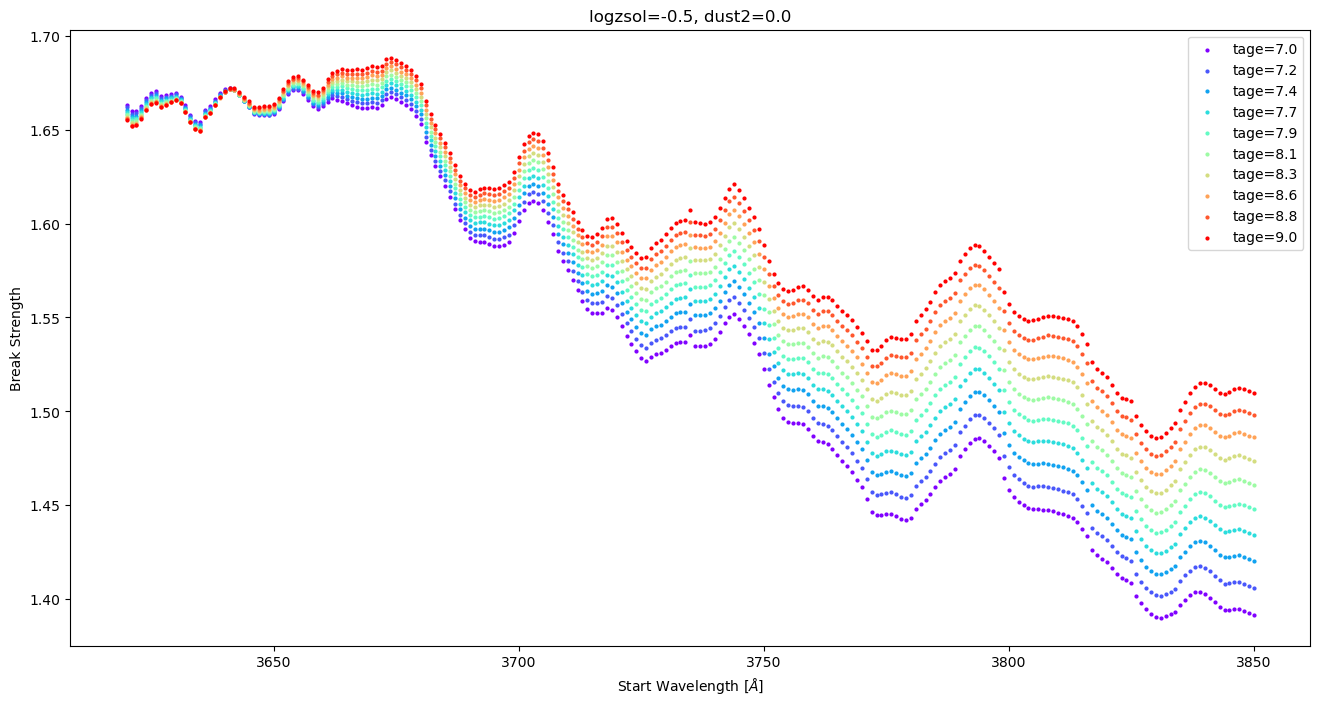

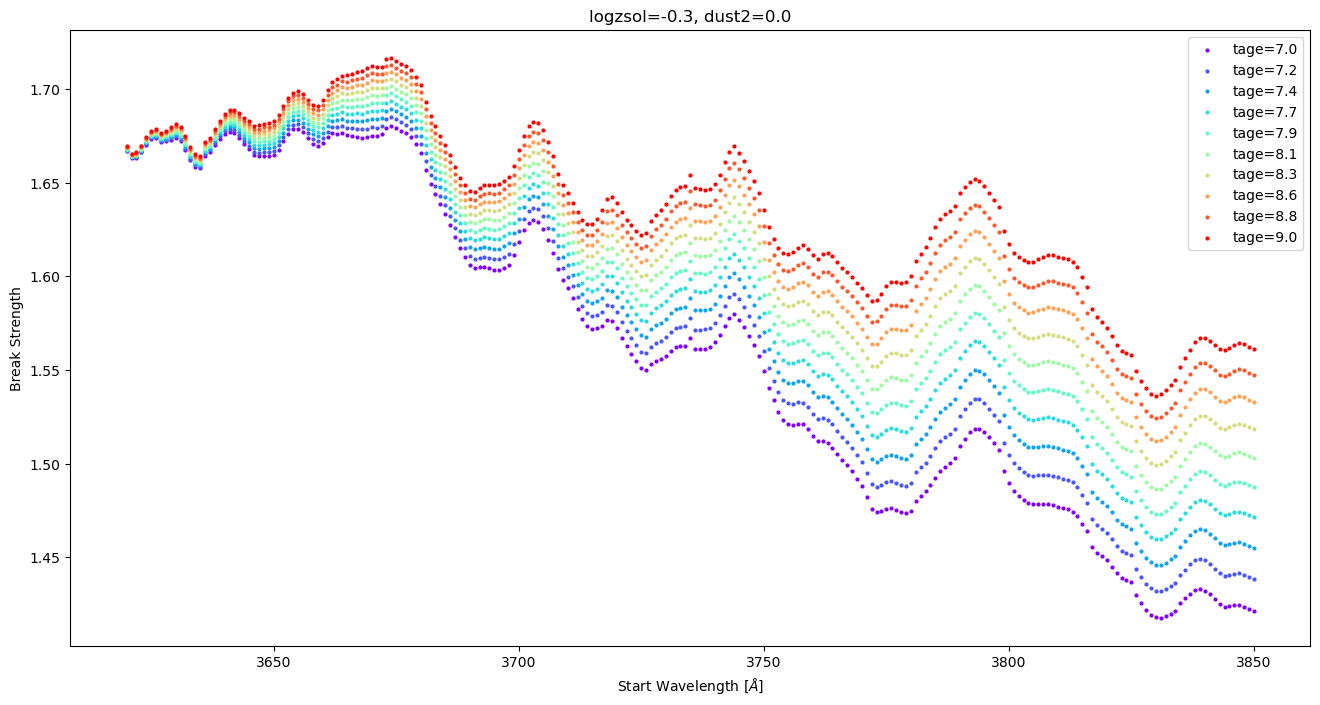

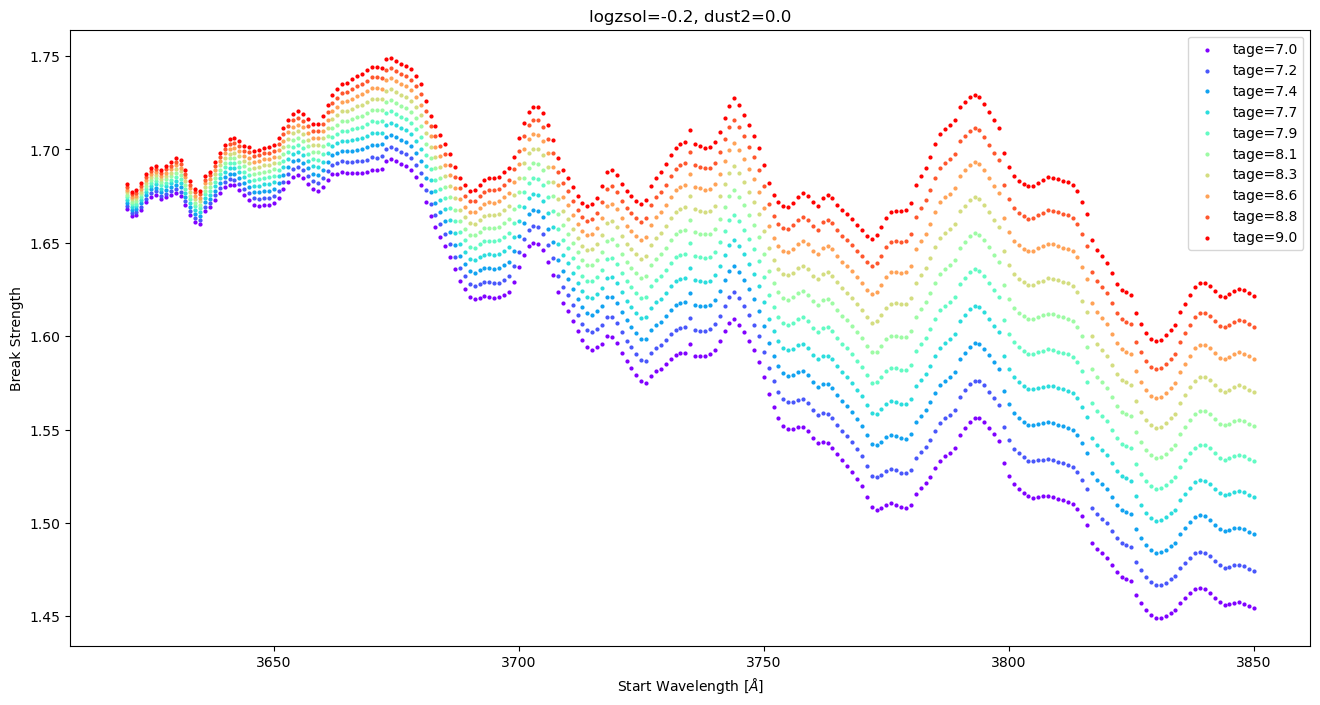

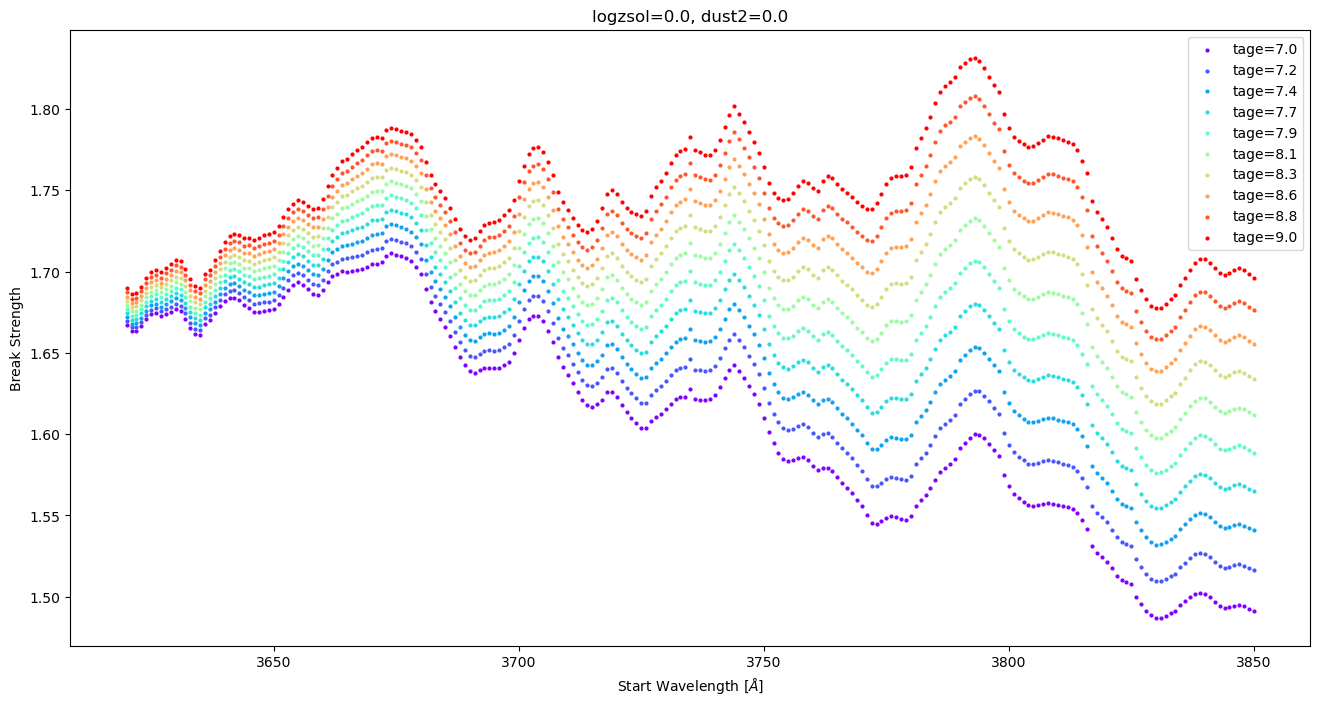

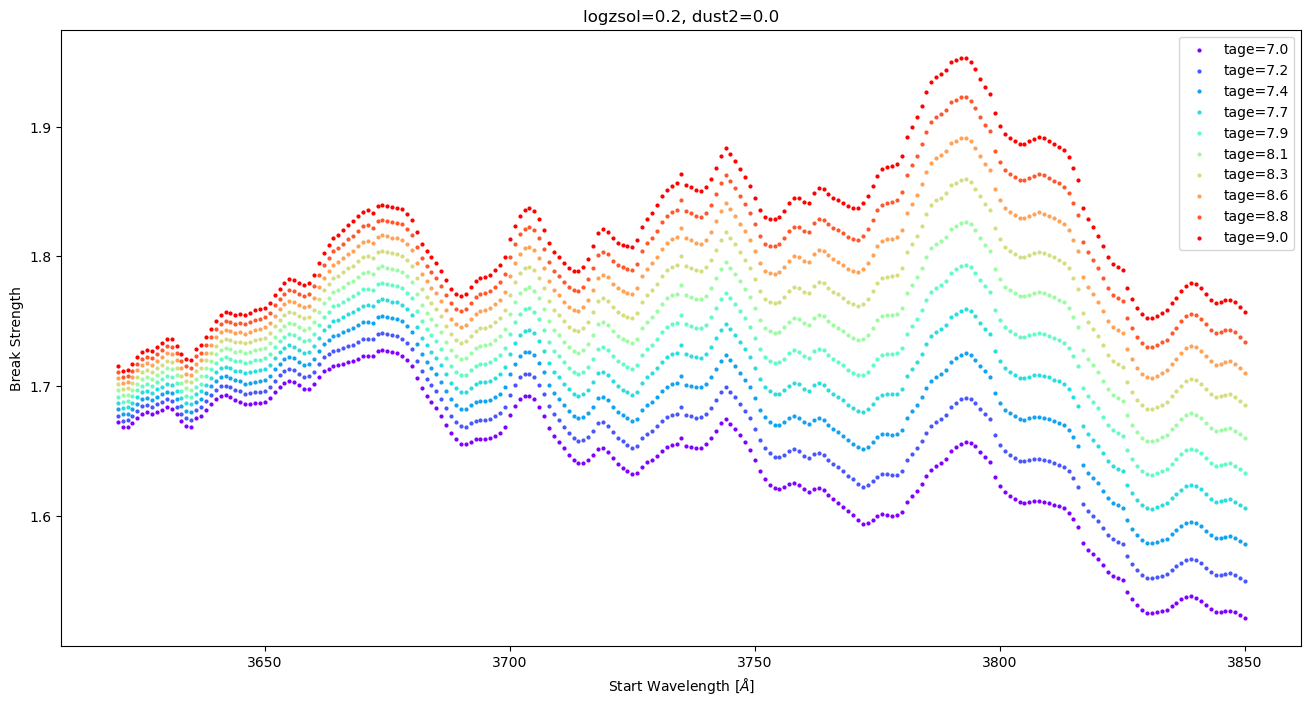

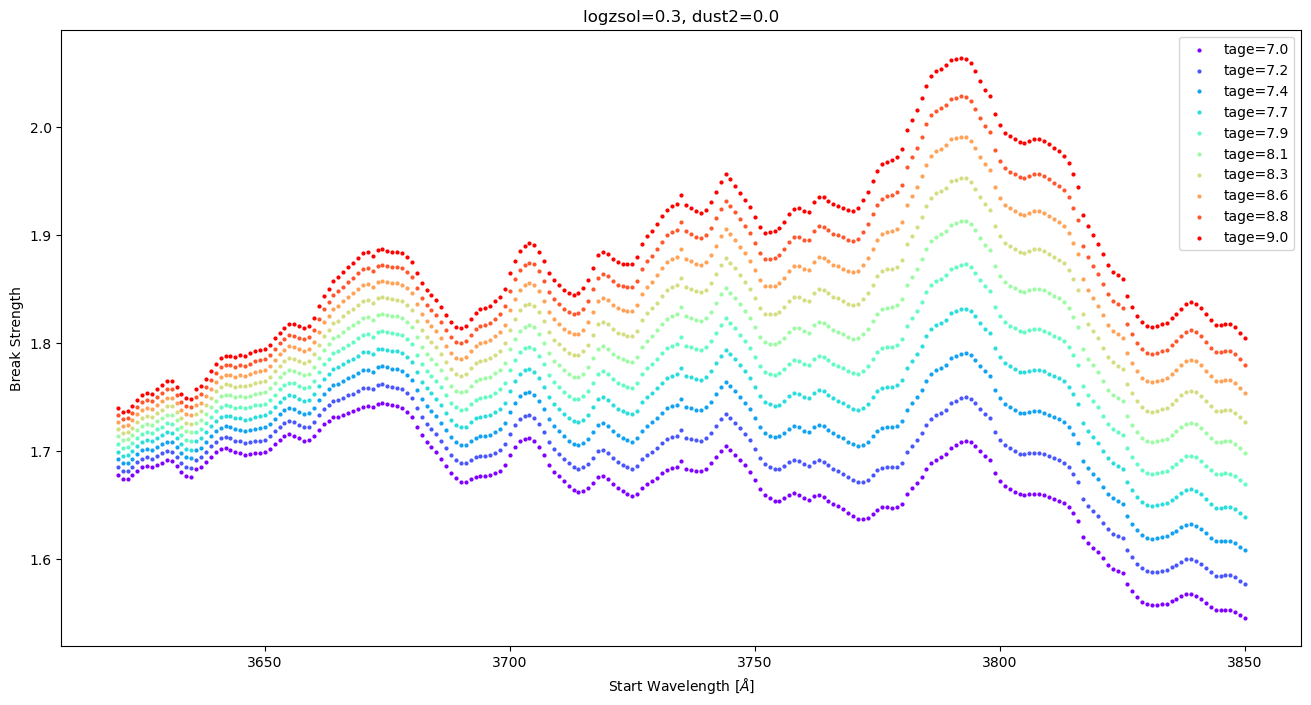

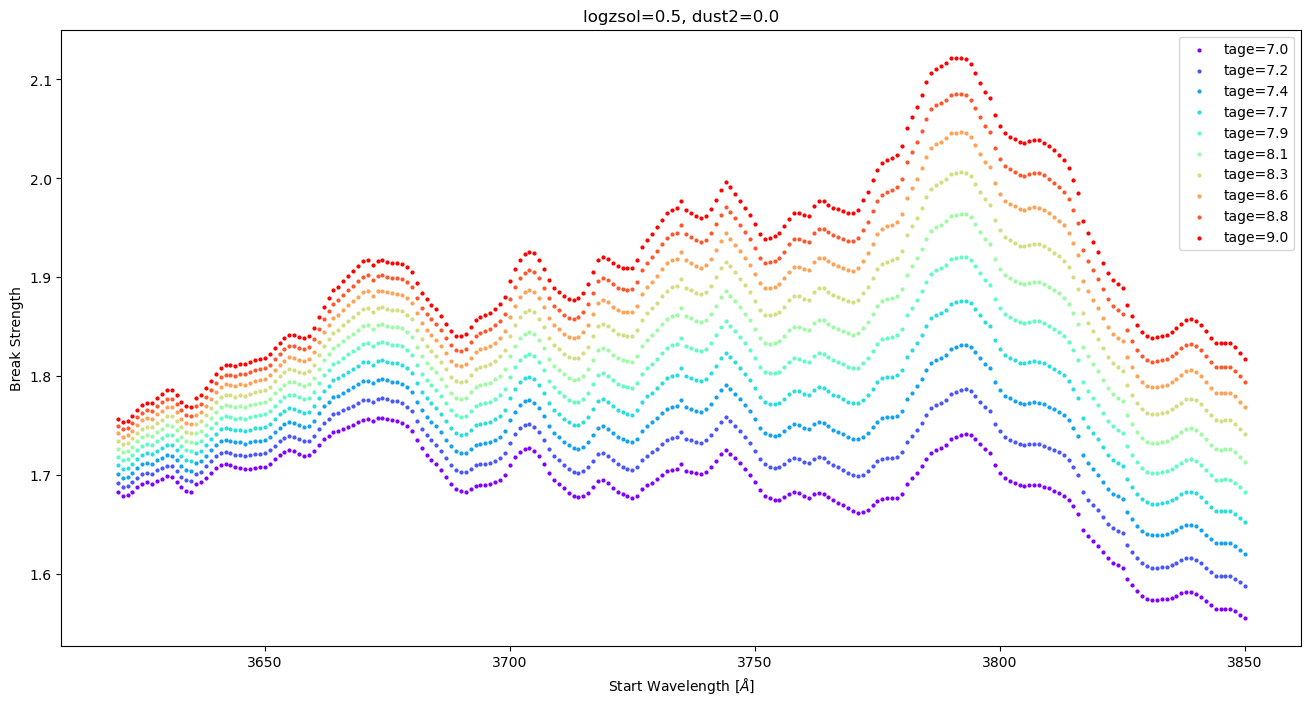

In [86]:
# [zred,mass,logz,dust,tage]
# [3.548, 1e8, -1.0, 0, 8.3]
# [    0,   0,    0, 0,   6]

i_dust = 0

for i_logz in range(len(logzs)):

    figure(figsize=(16,8))
    
    for i_tage in range(len(tages)):
    
        color = cm.rainbow(np.linspace(0, 1, len(tages)))
    
        for start in starts:
        
            if start != starts[-1]:
                B = break_strengths[f'data_grid_break_{start}'][i_logz,i_dust,i_tage,:]
                scatter(start, B, color=color[i_tage], s=4)
            else:
                B = break_strengths[f'data_grid_break_{start}'][i_logz,i_dust,i_tage,:]
                scatter(start, B, color=color[i_tage], s=4, label=f'tage={tages[i_tage]:.1f}')
    
    title_text = f'logzsol={logzs[i_logz]:.1f}, dust2={dusts[i_dust]}'
    title(title_text)
    
    xlabel(r'Start Wavelength [$\AA$]')
    ylabel('Break Strength')
    
    legend()
    
    show()

-----------

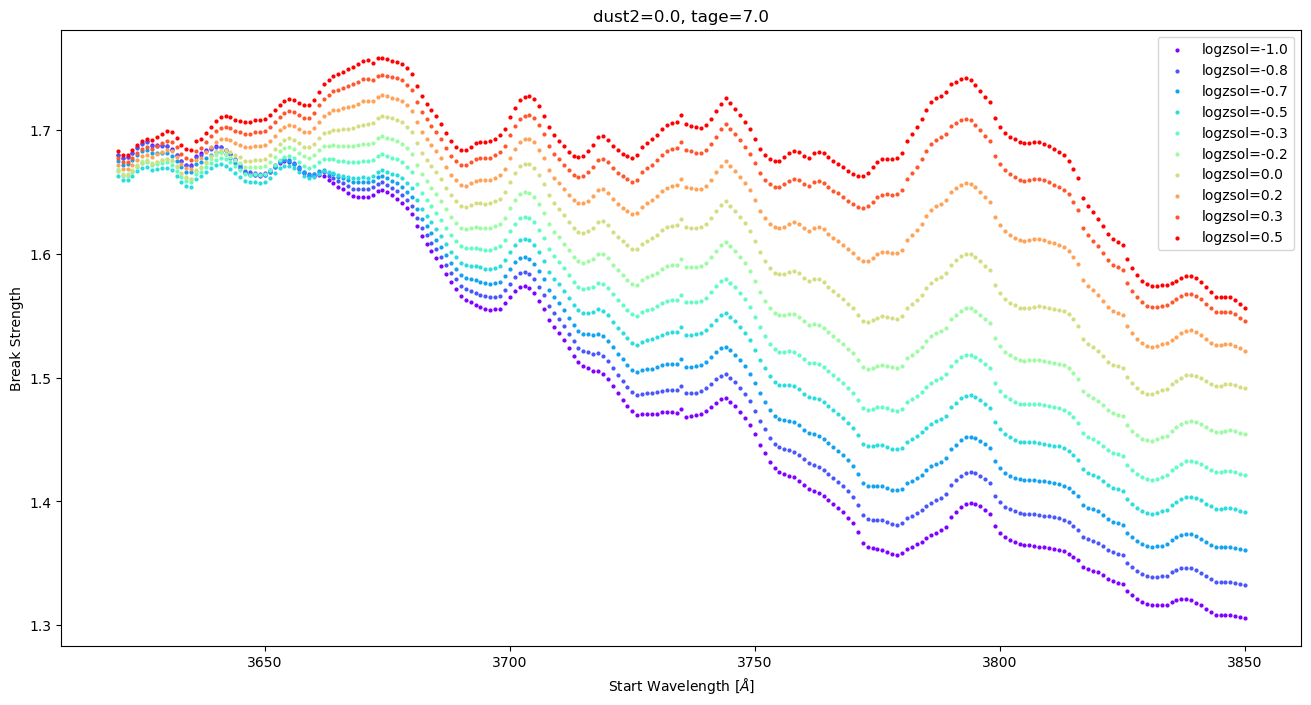

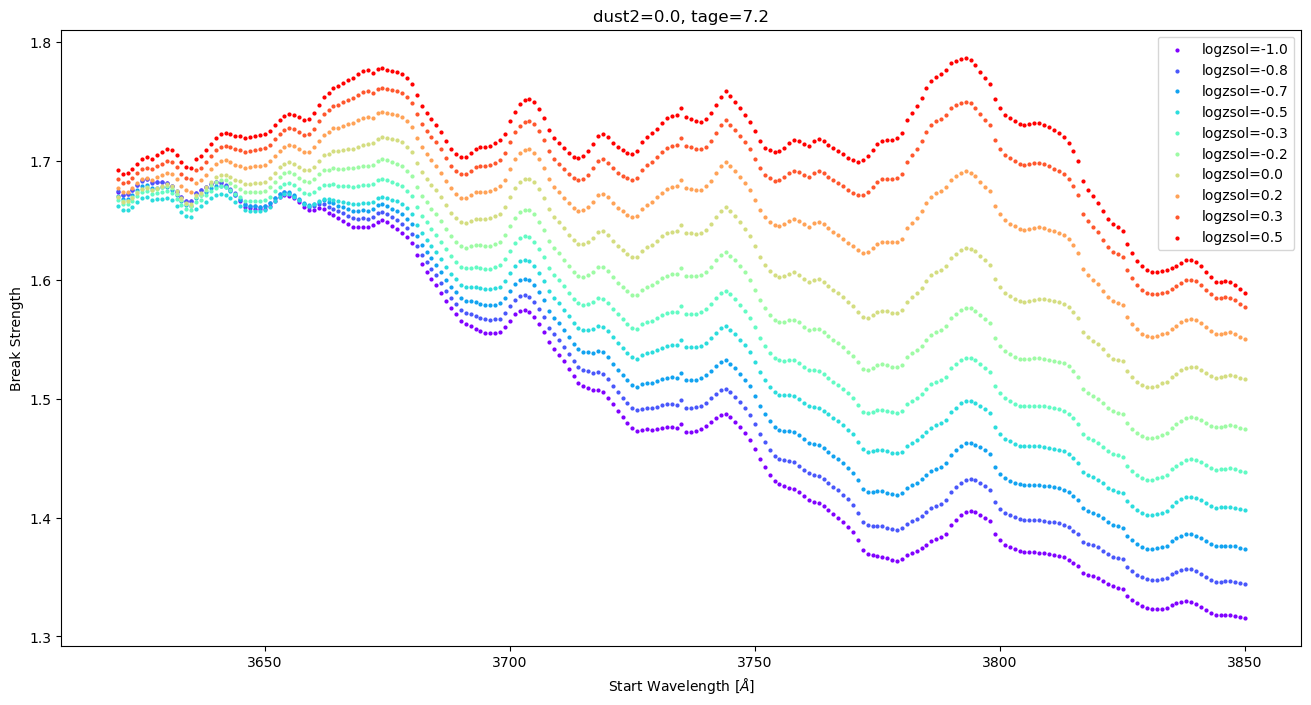

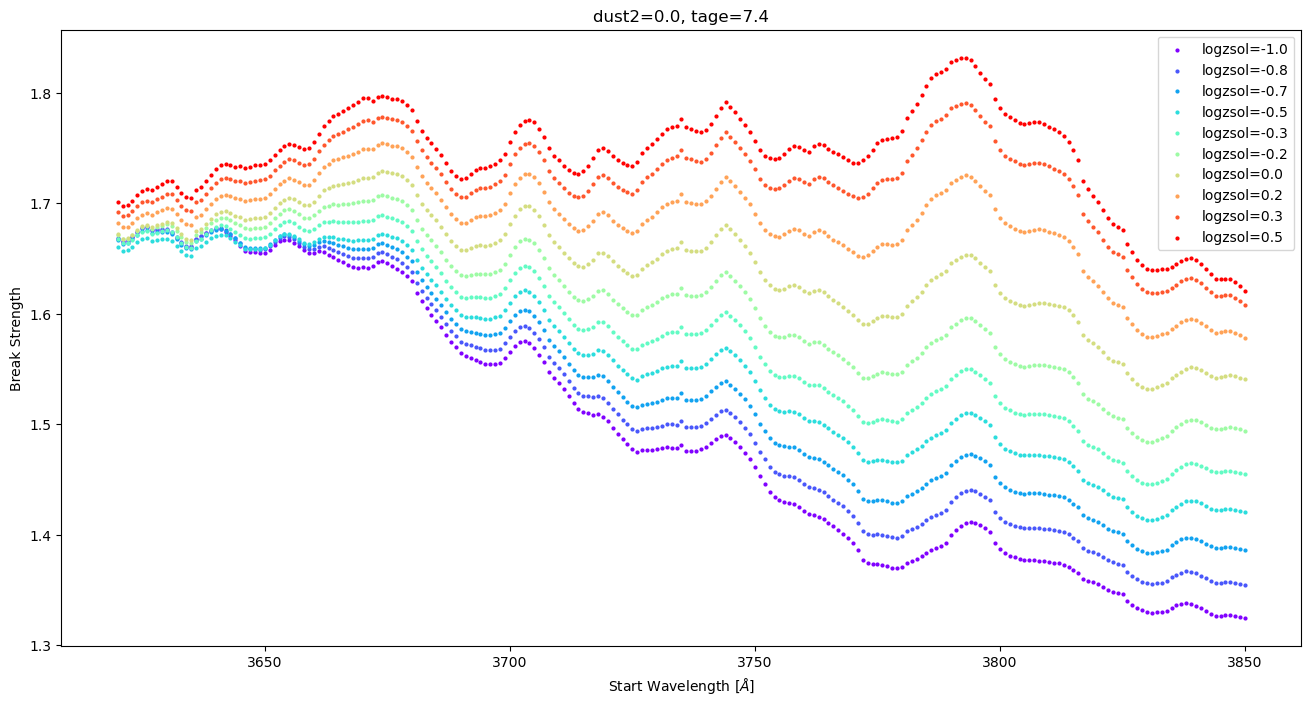

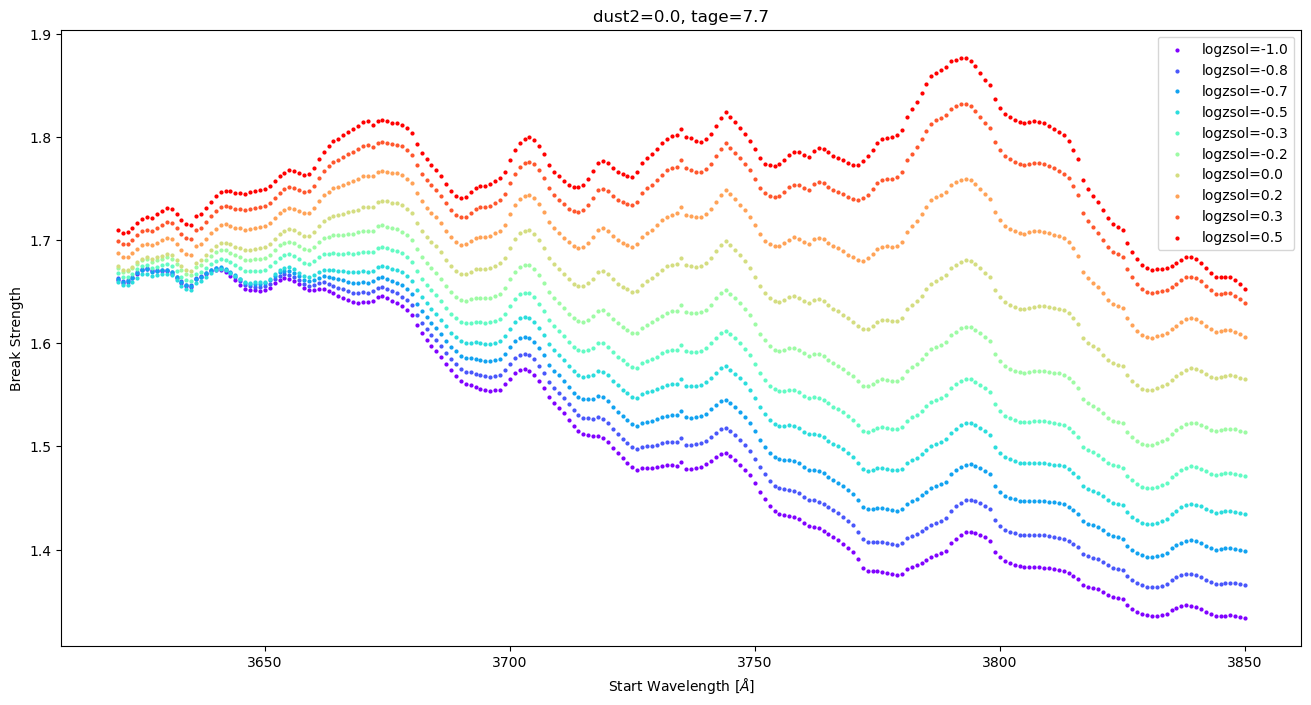

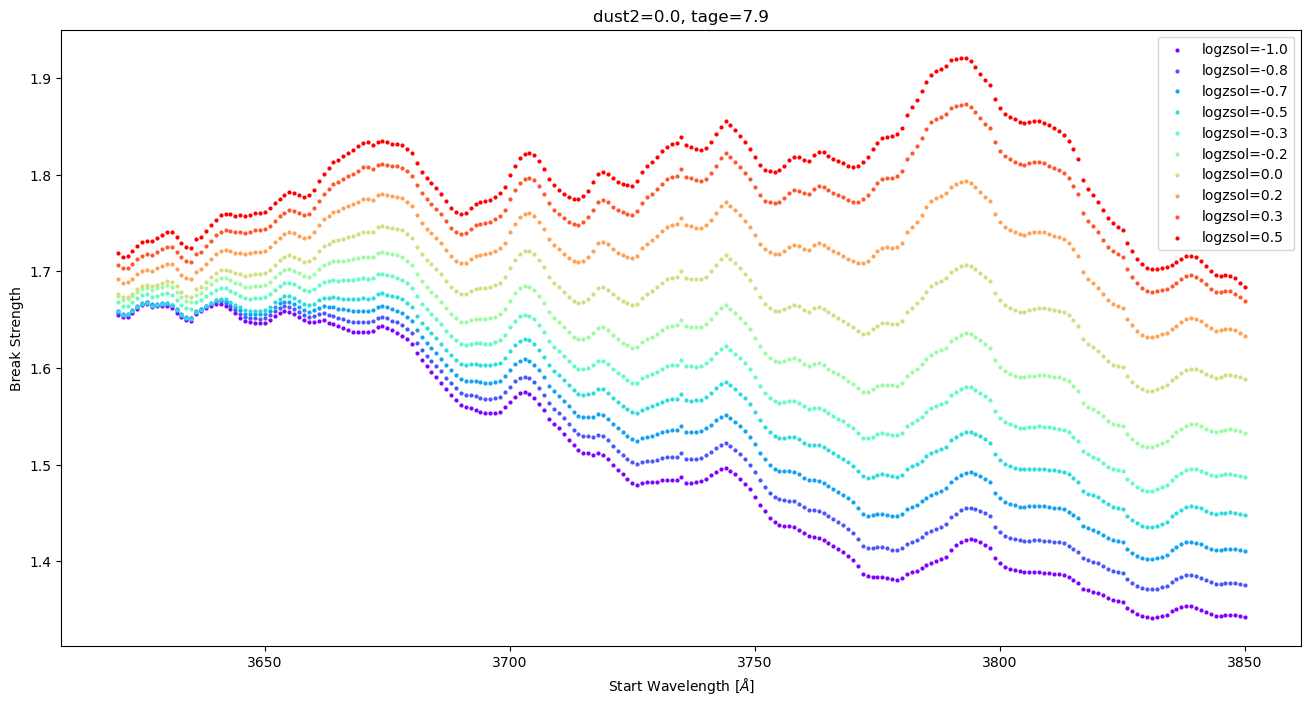

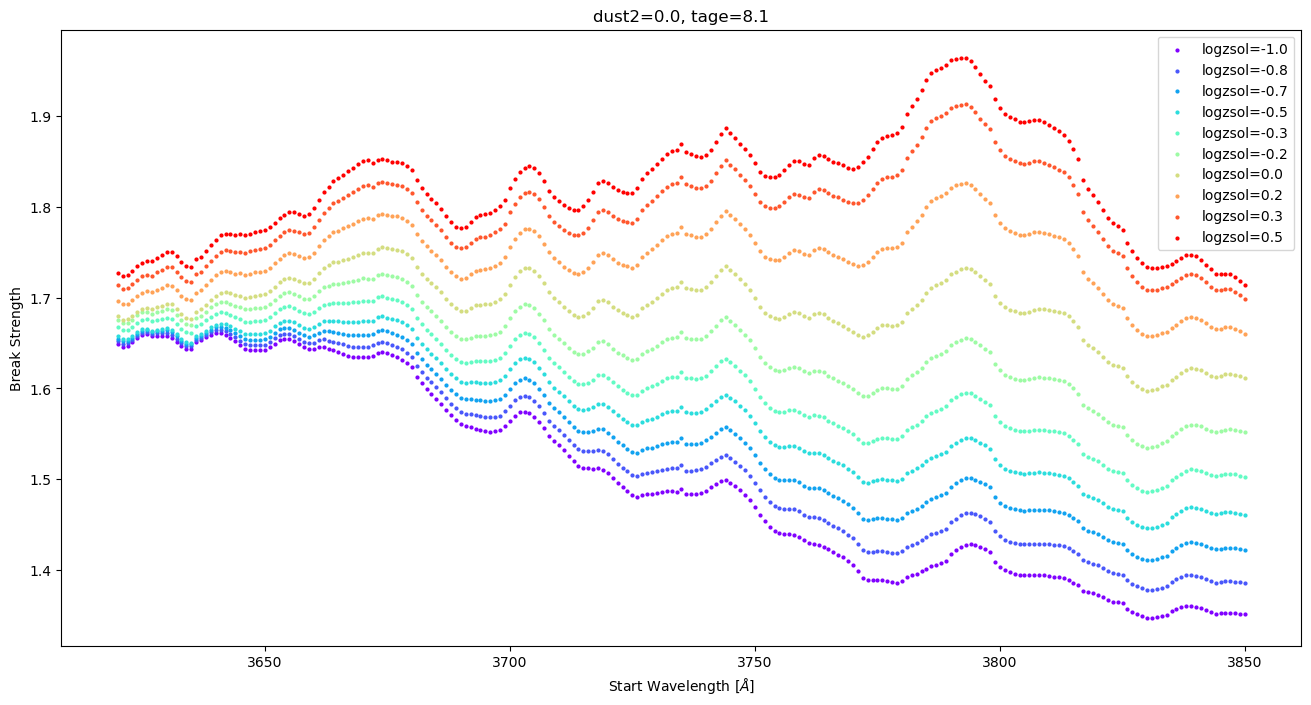

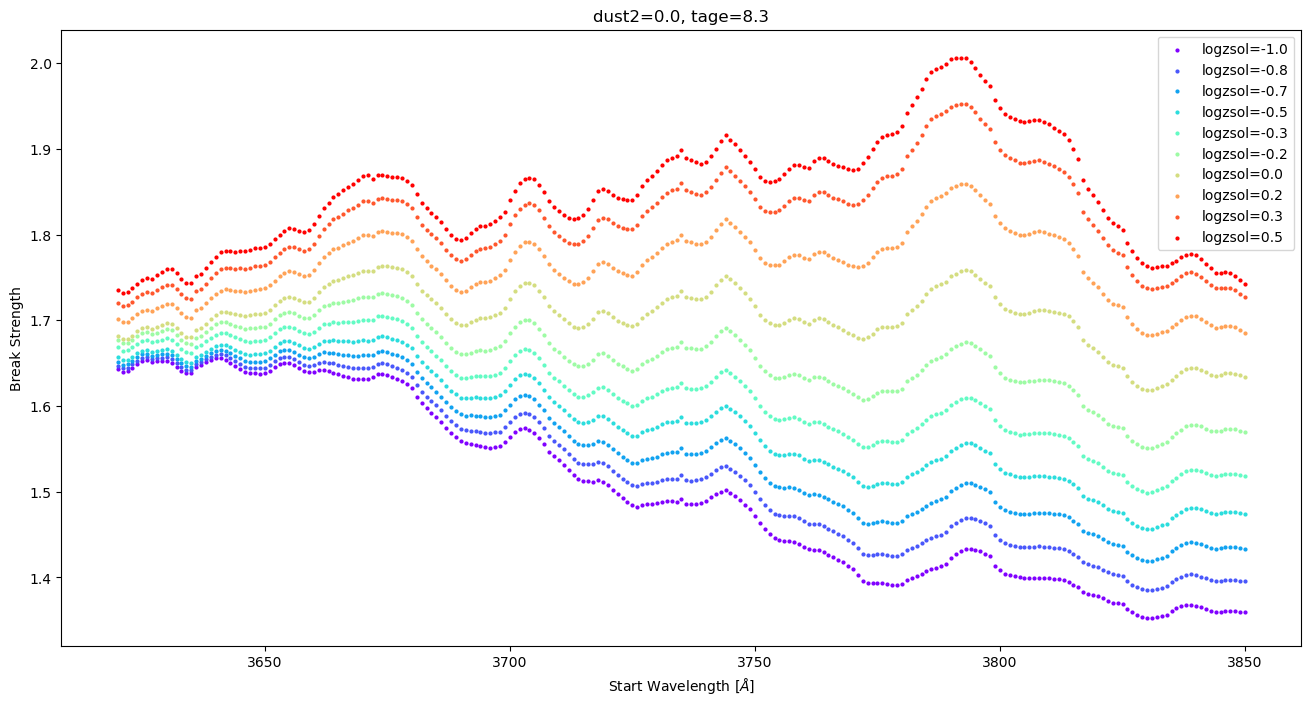

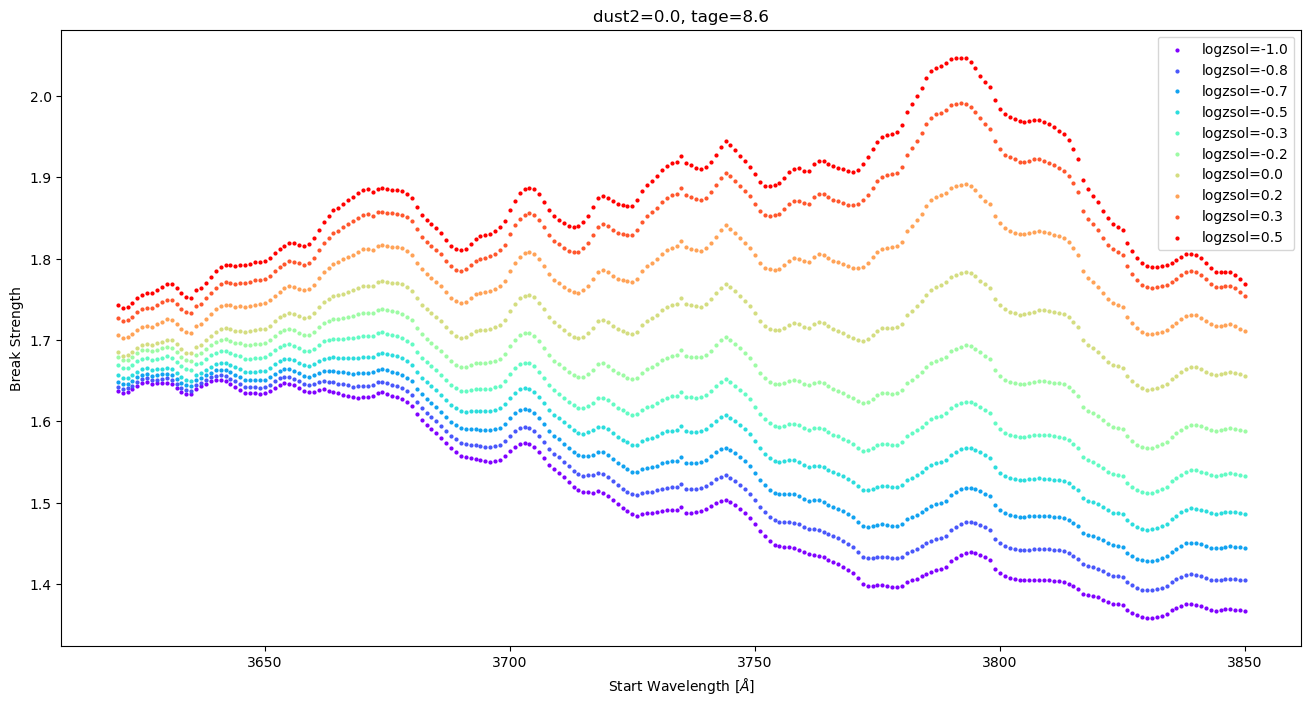

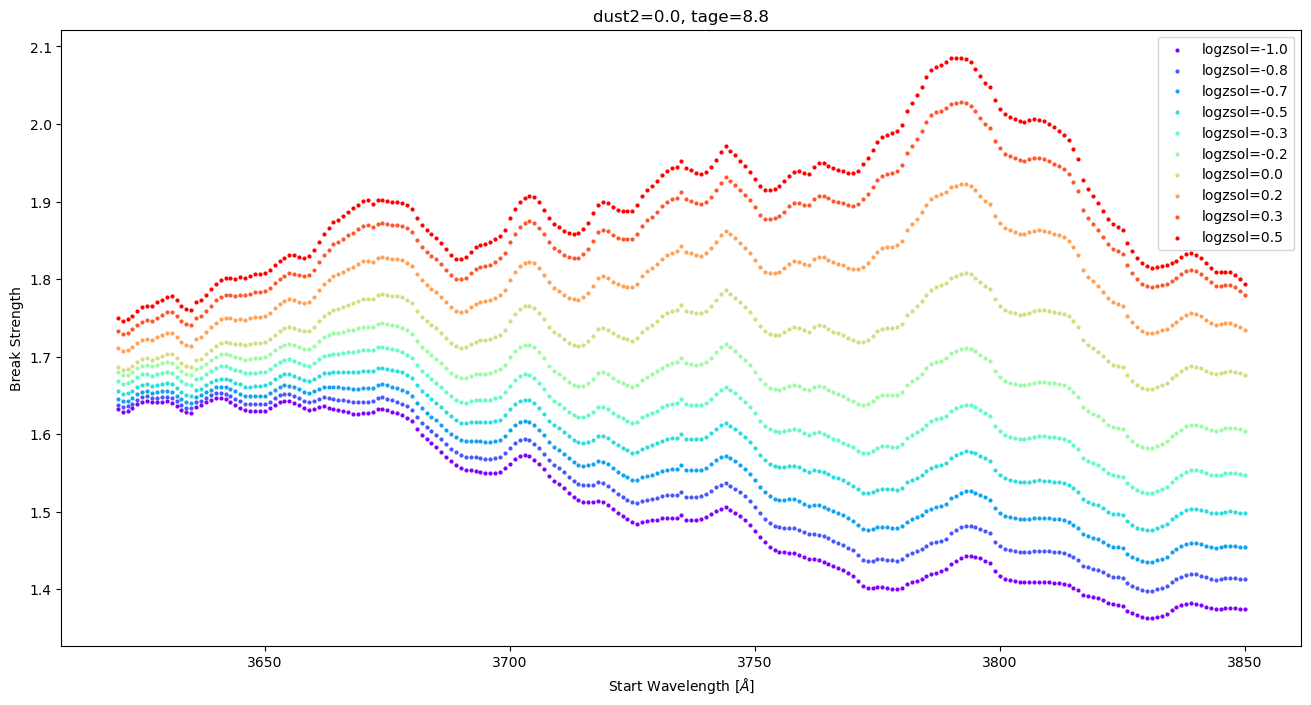

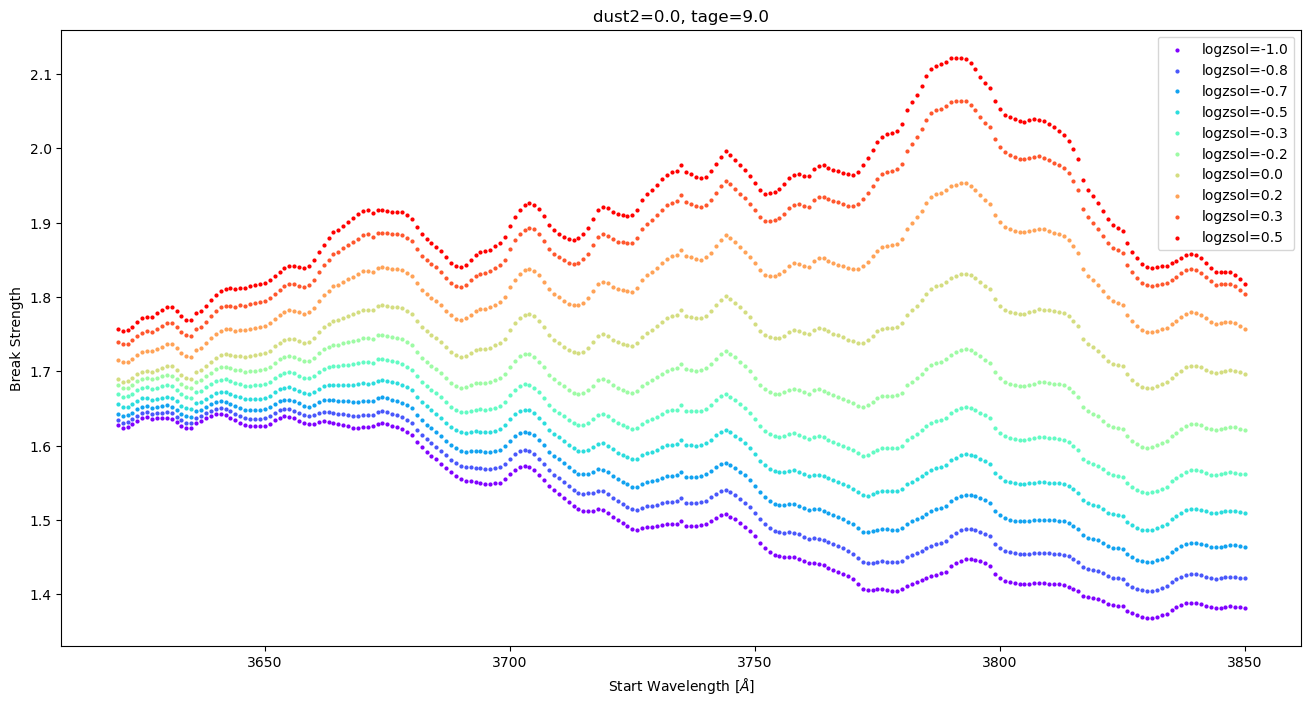

In [87]:
i_dust = 0

for i_tage in range(len(tages)):

    figure(figsize=(16,8))
    
    for i_logz in range(len(logzs)):
    
        color = cm.rainbow(np.linspace(0, 1, len(logzs)))
    
        for start in starts:
        
            if start != starts[-1]:
                B = break_strengths[f'data_grid_break_{start}'][i_logz,i_dust,i_tage,:]
                scatter(start, B, color=color[i_logz], s=4)
            else:
                B = break_strengths[f'data_grid_break_{start}'][i_logz,i_dust,i_tage,:]
                scatter(start, B, color=color[i_logz], s=4, label=f'logzsol={logzs[i_logz]:.1f}')
    
    title_text = f'dust2={dusts[i_dust]}, tage={tages[i_tage]:.1f}'
    title(title_text)
    
    xlabel(r'Start Wavelength [$\AA$]')
    ylabel('Break Strength')
    
    legend()
    
    show()

-------------